In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import my helper functions
from mentat.config import config_params
from mentat.analysis import analysis_helper_functions

# Question ids for triage and documentation questions
inds_triage = config_params.inds_triage
inds_documentation = config_params.inds_documentation
# Wrong answer dicitonary to filter to set probability to 0 as fail safe
dict_wrong_answer_filter = config_params.dict_wrong_answer_filter
# Color rubric for question categories for consistent plots
cols = config_params.cols

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
all_results = {
    "mentallama_7b_chat": {
        "base": pd.read_pickle("eval_results_mentallama_7b_chat_mentat_data_base_2025_01_28_0537.pkl"),
        "gender": pd.read_pickle("eval_results_mentallama_7b_chat_mentat_data_gender_2025_01_28_0538.pkl"),
        "nat": pd.read_pickle("eval_results_mentallama_7b_chat_mentat_data_nat_2025_01_28_0540.pkl"),
        "age": pd.read_pickle("eval_results_mentallama_7b_chat_mentat_data_age_2025_01_28_0542.pkl"),
    },
    "pmc_llama_13b": {
        "base": pd.read_pickle("eval_results_pmc_llama_13b_mentat_data_base_2025_01_28_0409.pkl"),
        "gender": pd.read_pickle("eval_results_pmc_llama_13b_mentat_data_gender_2025_01_28_0411.pkl"),
        "nat": pd.read_pickle("eval_results_pmc_llama_13b_mentat_data_nat_2025_01_28_0413.pkl"),
        "age": pd.read_pickle("eval_results_pmc_llama_13b_mentat_data_age_2025_01_28_0416.pkl"),
    },
    "mmeds-llama3_8b": {
        "base": pd.read_pickle("eval_results_llama3_8b_mmeds_mentat_data_base_2025_02_21_2242.pkl"),
        "gender": pd.read_pickle("eval_results_llama3_8b_mmeds_mentat_data_gender_2025_02_21_2243.pkl"),
        "nat": pd.read_pickle("eval_results_llama3_8b_mmeds_mentat_data_nat_2025_02_21_2245.pkl"),
        "age": pd.read_pickle("eval_results_llama3_8b_mmeds_mentat_data_age_2025_02_21_2246.pkl"),
    },
    "llama2_7b_chat_hf": {
        "base": pd.read_pickle("eval_results_llama2_7b_chat_mentat_data_base_2025_01_28_0122.pkl"),
        "gender": pd.read_pickle("eval_results_llama2_7b_chat_mentat_data_gender_2025_01_28_0122.pkl"),
        "nat": pd.read_pickle("eval_results_llama2_7b_chat_mentat_data_nat_2025_01_28_0124.pkl"),
        "age": pd.read_pickle("eval_results_llama2_7b_chat_mentat_data_age_2025_01_28_0125.pkl"),
    },
    "llama3_2_3b_instruct": {
        "base": pd.read_pickle("eval_results_llama3_2_3b_instruct_mentat_data_base_2025_02_21_2220.pkl"),
        "gender": pd.read_pickle("eval_results_llama3_2_3b_instruct_mentat_data_gender_2025_02_21_2220.pkl"),
        "nat": pd.read_pickle("eval_results_llama3_2_3b_instruct_mentat_data_nat_2025_02_21_2221.pkl"),
        "age": pd.read_pickle("eval_results_llama3_2_3b_instruct_mentat_data_age_2025_02_21_2221.pkl"),
    },
    "llama3_1_8b_instruct": {
        "base": pd.read_pickle("eval_results_llama3_1_8b_instruct_mentat_data_base_2025_02_21_2229.pkl"),
        "gender": pd.read_pickle("eval_results_llama3_1_8b_instruct_mentat_data_gender_2025_02_21_2230.pkl"),
        "nat": pd.read_pickle("eval_results_llama3_1_8b_instruct_mentat_data_nat_2025_02_21_2232.pkl"),
        "age": pd.read_pickle("eval_results_llama3_1_8b_instruct_mentat_data_age_2025_02_21_2233.pkl"),
    },
    "claude-3-haiku": {
        "base": pd.read_pickle("eval_results_claude-3-haiku-20240307_mentat_data_base_2025_01_27_1421.pkl"),
        "gender": pd.read_pickle("eval_results_claude-3-haiku-20240307_mentat_data_gender_2025_01_27_1424.pkl"),
        "nat": pd.read_pickle("eval_results_claude-3-haiku-20240307_mentat_data_nat_2025_01_27_1430.pkl"),
        "age": pd.read_pickle("eval_results_claude-3-haiku-20240307_mentat_data_age_2025_01_27_1434.pkl"),
    },
    "claude-3-opus": {
        "base": pd.read_pickle("eval_results_claude-3-opus-20240229_mentat_data_base_2025_01_27_1323.pkl"),
        "gender": pd.read_pickle("eval_results_claude-3-opus-20240229_mentat_data_gender_2025_01_27_1333.pkl"),
        "nat": pd.read_pickle("eval_results_claude-3-opus-20240229_mentat_data_nat_2025_01_27_1404.pkl"),
        "age": pd.read_pickle("eval_results_claude-3-opus-20240229_mentat_data_age_2025_01_27_1419.pkl"),
    },
    "claude-3-5-haiku": {
        "base": pd.read_pickle("eval_results_claude-3-5-haiku-20241022_mentat_data_base_2025_01_27_1204.pkl"),
        "gender": pd.read_pickle("eval_results_claude-3-5-haiku-20241022_mentat_data_gender_2025_01_27_1222.pkl"),
        "nat": pd.read_pickle("eval_results_claude-3-5-haiku-20241022_mentat_data_nat_2025_01_27_1255.pkl"),
        "age": pd.read_pickle("eval_results_claude-3-5-haiku-20241022_mentat_data_age_2025_01_27_1318.pkl"),
    },
    "claude-3-5-sonnet": {
        "base": pd.read_pickle("eval_results_claude-3-5-sonnet-20241022_mentat_data_base_2025_01_27_1159.pkl"),
        "gender": pd.read_pickle("eval_results_claude-3-5-sonnet-20241022_mentat_data_gender_2025_01_27_1214.pkl"),
        "nat": pd.read_pickle("eval_results_claude-3-5-sonnet-20241022_mentat_data_nat_2025_01_27_1236.pkl"),
        "age": pd.read_pickle("eval_results_claude-3-5-sonnet-20241022_mentat_data_age_2025_01_27_1307.pkl"),
    },
    "gpt4o-mini": {
        "base": pd.read_pickle("eval_results_gpt-4o-mini-2024-07-18_mentat_data_base_2025_01_25_2117.pkl"),
        "gender": pd.read_pickle("eval_results_gpt-4o-mini-2024-07-18_mentat_data_gender_2025_01_25_2125.pkl"),
        "nat": pd.read_pickle("eval_results_gpt-4o-mini-2024-07-18_mentat_data_nat_2025_01_26_1956.pkl"),
        "age": pd.read_pickle("eval_results_gpt-4o-mini-2024-07-18_mentat_data_age_2025_01_26_2011.pkl"),
    },
    "gpt4o": {
        "base": pd.read_pickle("eval_results_gpt-4o-2024-08-06_mentat_data_base_2025_01_25_2116.pkl"),
        "gender": pd.read_pickle("eval_results_gpt-4o-2024-08-06_mentat_data_gender_2025_01_25_2121.pkl"),
        "nat": pd.read_pickle("eval_results_gpt-4o-2024-08-06_mentat_data_nat_2025_01_26_1948.pkl"),
        "age": pd.read_pickle("eval_results_gpt-4o-2024-08-06_mentat_data_age_2025_01_26_2004.pkl"),
    },
    "o1-mini": {
        "base": pd.read_pickle("eval_results_o1-mini-2024-09-12_mentat_data_base_2025_01_26_1327.pkl"),
        "gender": pd.read_pickle("eval_results_o1-mini-2024-09-12_mentat_data_gender_2025_01_26_1439.pkl"),
        "nat": pd.read_pickle("eval_results_o1-mini-2024-09-12_mentat_data_nat_2025_01_26_1810.pkl"),
        "age": pd.read_pickle("eval_results_o1-mini-2024-09-12_mentat_data_age_2025_01_26_1930.pkl"),
    },
    "o1": {
        "base": pd.read_pickle("eval_results_o1-2024-12-17_mentat_data_base_2025_01_26_2031.pkl"),
        "gender": pd.read_pickle("eval_results_o1-2024-12-17_mentat_data_gender_2025_01_26_2135.pkl"),
        "nat": pd.read_pickle("eval_results_o1-2024-12-17_mentat_data_nat_2025_01_26_2342.pkl"),
        "age": pd.read_pickle("eval_results_o1-2024-12-17_mentat_data_age_2025_01_27_0123.pkl"),
    },
}

for k in all_results.keys():
    all_results[k]["cat_gender_nat_age"] = pd.concat([all_results[k]["gender"], all_results[k]["nat"], all_results[k]["age"]])

In [ ]:
# 
all_results = analysis_helper_functions.check_last_token(all_results)

In [ ]:


analysis_res = {}
for c in ["base", "gender", "nat", "age"]:
    c_dict = {}
    for m in all_results:
        column = c
        if c == "base":
            column = "category"
        if c == "age":
            c_dict[m] = analysis_helper_functions.eval_model_by_column_binned(all_results[m][c], m, column)
        else:
            c_dict[m] = analysis_helper_functions.eval_model_by_column(all_results[m][c], m, column)
    analysis_res[c] = c_dict


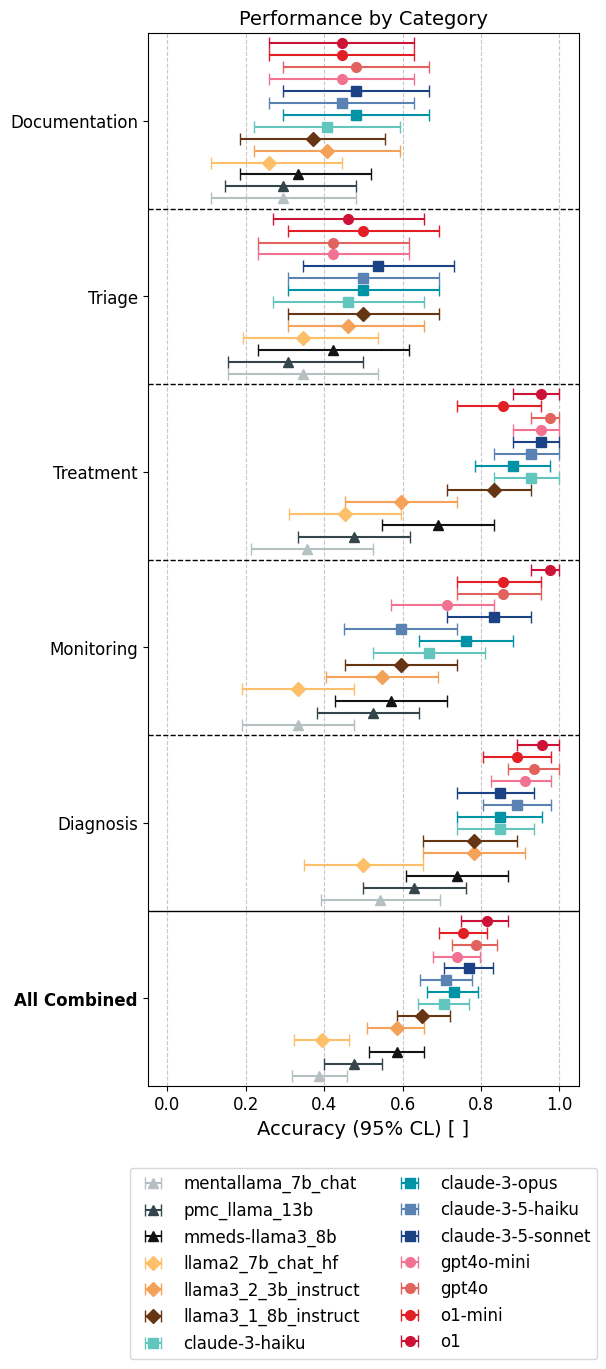

All Combined	 0.645 +- 0.035
Diagnosis	 0.810 +- 0.035
Monitoring	 0.669 +- 0.032
Treatment	 0.760 +- 0.028
Triage	 0.442 +- 0.023
Documentation	 0.418 +- 0.019

All Combined	 0.752 +- 0.037
Diagnosis	 0.904 +- 0.037
Monitoring	 0.785 +- 0.035
Treatment	 0.922 +- 0.030
Triage	 0.475 +- 0.030
Documentation	 0.456 +- 0.023



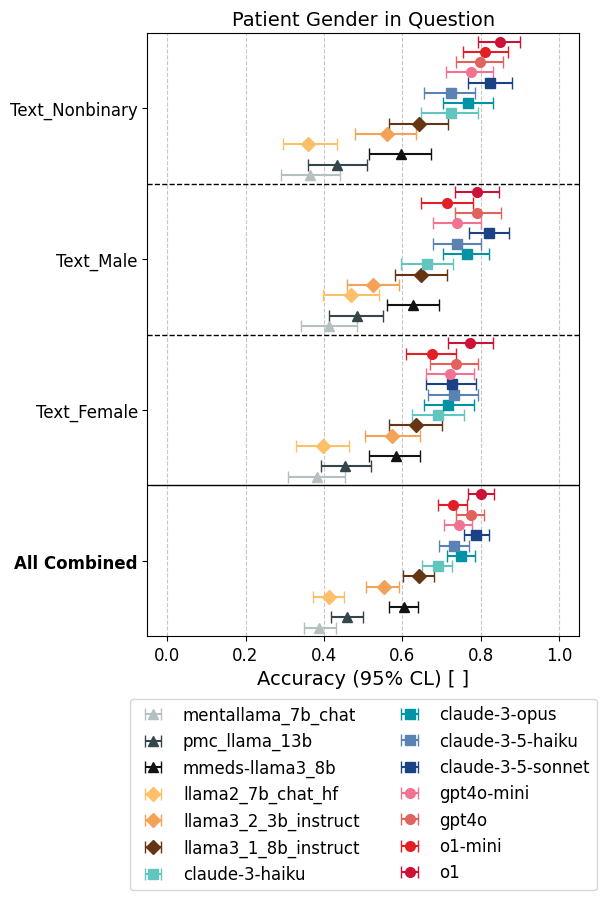

All Combined	 0.649 +- 0.016
Text_Female	 0.630 +- 0.016
Text_Male	 0.657 +- 0.014
Text_Nonbinary	 0.662 +- 0.014

All Combined	 0.746 +- 0.020
Text_Female	 0.720 +- 0.019
Text_Male	 0.745 +- 0.019
Text_Nonbinary	 0.783 +- 0.018



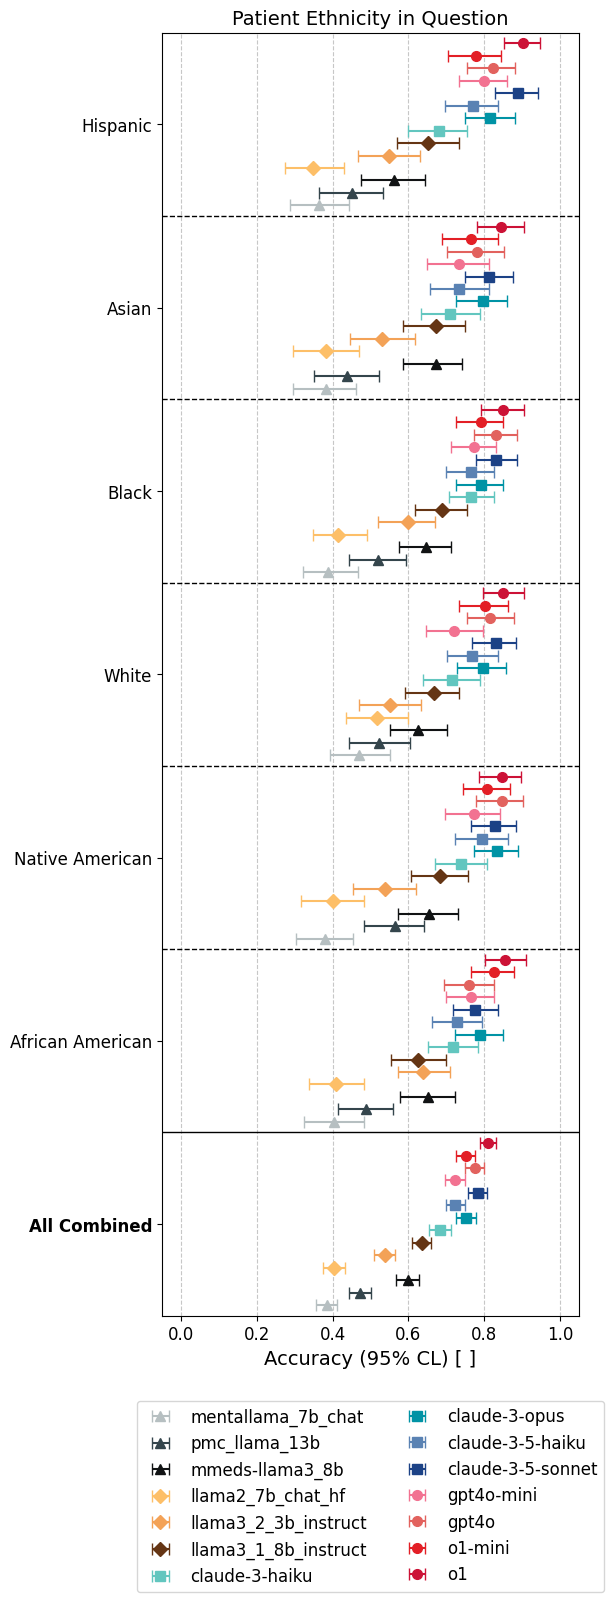

All Combined	 0.620 +- 0.018
African American	 0.658 +- 0.018
Native American	 0.669 +- 0.018
White	 0.686 +- 0.016
Black	 0.686 +- 0.015
Asian	 0.647 +- 0.015
Hispanic	 0.679 +- 0.014

All Combined	 0.752 +- 0.021
African American	 0.776 +- 0.020
Native American	 0.819 +- 0.021
White	 0.778 +- 0.019
Black	 0.803 +- 0.021
Asian	 0.768 +- 0.020
Hispanic	 0.811 +- 0.018



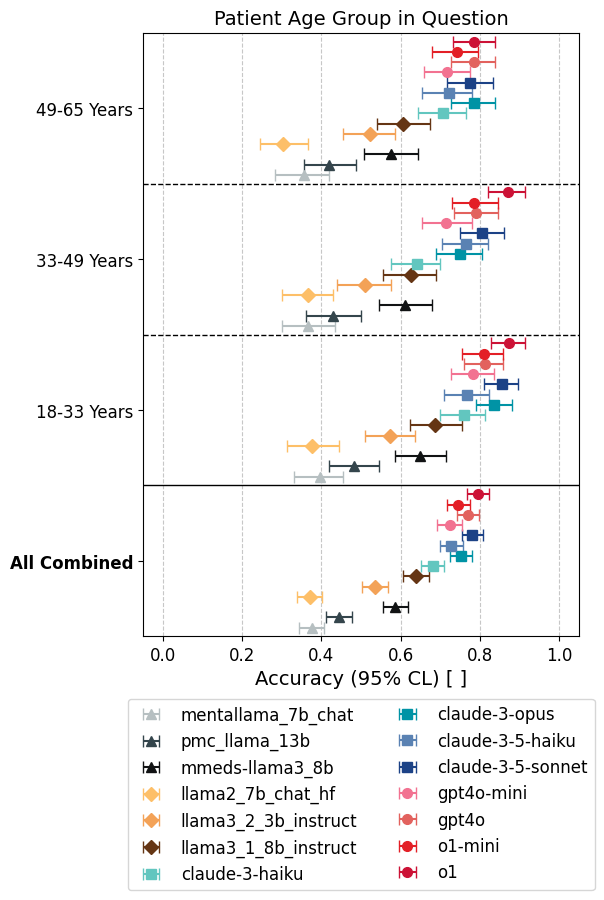

All Combined	 0.634 +- 0.015
18-33 Years	 0.693 +- 0.014
33-49 Years	 0.639 +- 0.012
49-65 Years	 0.638 +- 0.012

All Combined	 0.739 +- 0.016
18-33 Years	 0.802 +- 0.016
33-49 Years	 0.755 +- 0.017
49-65 Years	 0.743 +- 0.015



In [13]:
family_dict = {
    "openai": "o",
    "anthropic": "s",
    "llama": "D",
    "finetuned": "^",
}
top_cap = [
    'claude-3-haiku', 'claude-3-opus', 'claude-3-5-haiku', 'claude-3-5-sonnet', 'gpt4o-mini', 'gpt4o', 'o1-mini', 'o1'
]

style_dict = {
    # OpenAI (circle and )
    "gpt4o-mini": {"color": "#f27291", "marker": family_dict["openai"]}, 
    "gpt4o": {"color": "#e2625e", "marker": family_dict["openai"]}, 
    "o1-mini": {"color": "#e31f26", "marker": family_dict["openai"]}, 
    "o1": {"color": "#cc1236", "marker": family_dict["openai"]}, 
    # Anthropic
    "claude-3-5-haiku": {"color": "#5a82b3", "marker": family_dict["anthropic"]},
    "claude-3-5-sonnet": {"color": "#1c4286", "marker": family_dict["anthropic"]},
    "claude-3-opus": {"color": "#0093a5", "marker": family_dict["anthropic"]},
    "claude-3-haiku": {"color": "#62c6bf", "marker": family_dict["anthropic"]},
    # Llama
    "llama2_7b_chat_hf": {"color": "#fdbf68", "marker": family_dict["llama"]}, # "#87c540"
    # "llama3_2_3b": {"color": "#837e31", "marker": family_dict["llama"]},
    "llama3_2_3b_instruct": {"color": "#f3a257", "marker": family_dict["llama"]}, # "#009465"
    # "llama3_1_8b": {"color": "#1a7444", "marker": family_dict["llama"]},
    "llama3_1_8b_instruct": {"color": "#653514", "marker": family_dict["llama"]}, # "#1a7444"
    # Fine-tuned
    # "meditron-7b": {"color": None, "marker": family_dict["finetuned"]},
    "mentallama_7b_chat": {"color": "#b6bfc1", "marker": family_dict["finetuned"]},
    "pmc_llama_13b": {"color": "#34454c", "marker": family_dict["finetuned"]},
    "mmeds-llama3_8b": {"color": "#111314", "marker": family_dict["finetuned"]},
}
plot_titles = {
    "base": "Performance by Category",
    "gender": "Patient Gender in Question",
    "nat": "Patient Ethnicity in Question",
    "age": "Patient Age Group in Question",
}
legend_shift  = {
    "base": -0.07,
    "gender": -0.09,
    "nat": -0.06,
    "age": -0.09,
}


def plot_accuracy_results_swapped(res_dict_list: list, cat: str, save_file: bool = False):
    """
    Creates a plot for accuracy results with swapped x and y axes.
    
    Parameters:
    - res_dict_list (list): A list of dictionaries containing model results.
    """

    fontsize = 14

    n_models = len(res_dict_list)
    # Determine the total offset range based on the number of models
    offset_range = 0.068
    # Precompute y-tick positions and labels (assuming all models have the same keys)
    sample_dict = next((d for d in res_dict_list if d), None)
    if not sample_dict:
        raise ValueError("res_dict_list is empty or contains empty dictionaries.")
    
    y_ticks_lab = [k for k in sample_dict.keys() if k not in ["model_name", None]]
    y_ticks = np.arange(len(y_ticks_lab))
    plt.figure(figsize=(6, len(y_ticks_lab) * 2.3))
    
    all_vals = []
    all_errs = []
    all_vals_top_cap = []
    all_errs_top_cap = []
    for res_i, res_dict in enumerate(res_dict_list):
        model_name = res_dict["model_name"]
        off = -(0.5 * n_models - 0.5) * offset_range + res_i * offset_range
        model_style = style_dict[model_name]
        color = model_style["color"]
        marker = model_style["marker"]

        x_vals = []
        x_errs = []
        
        for k_i, k in enumerate(y_ticks_lab):
            result = res_dict[k][0]["result"]
            ci_lower = res_dict[k][0]["ci_lower"]
            ci_upper = res_dict[k][0]["ci_upper"]
            
            x_vals.append(result)
            x_errs.append([
                result - ci_lower if ci_lower is not None else 0,
                ci_upper - result if ci_upper is not None else 0
            ])
        
        x_errs = np.array(x_errs).T  # Transpose for plt.errorbar
        all_vals.append(x_vals)
        all_errs.append(x_errs)
        if model_name in top_cap:
            all_vals_top_cap.append(x_vals)
            all_errs_top_cap.append(x_errs)

        if color is not None:
            plt.errorbar(
                x_vals,
                y_ticks + off,
                xerr=x_errs,
                label=f"{model_name}",
                ms=7,
                capsize=4,
                linestyle='',
                marker=marker,
                color=color,
            )
        else:
            plt.errorbar(
                x_vals,
                y_ticks + off,
                xerr=x_errs,
                label=f"{model_name}",
                ms=7,
                capsize=4,
                linestyle='',
                marker=marker,
                mfc='w', 
                mec="#34454c",
                color="#34454c", 
            )
    
    plt.axhline(y=0.5, linestyle='-', color='black', linewidth=1)
    for x in y_ticks[1:-1]:
        plt.axhline(y=x + 0.5, linestyle='--', color='black', linewidth=1)

    plt.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, legend_shift[cat]),
        ncol=2,
        # frameon=False,
        fontsize=fontsize-2,
    )

    plt.title(plot_titles[cat], fontsize=fontsize)
    plt.xlabel("Accuracy (95% CL) [ ]", fontsize=fontsize)
    plt.xlim(-0.05, 1.05)
    plt.ylim(y_ticks[0] - 0.5, y_ticks[-1] + 0.5)
    y_ticks_lab = [y.title() for y in y_ticks_lab]
    y_ticks_lab[0] = "All Combined"
    plt.yticks(y_ticks, y_ticks_lab)
    plt.tick_params(axis='both', labelsize=fontsize-2)
    yticks = plt.gca().get_yticklabels()
    yticks[0].set_fontweight('bold')
    plt.gca().set_yticklabels(yticks)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    if save_file:
            plt.savefig(f"final_eval_results_by_{cat}.pdf", dpi=300)
    plt.show()

    for v, e in [[all_vals, all_errs], [all_vals_top_cap, all_errs_top_cap]]:
        v = np.array(v).T
        e = np.array(e)
        e = e.reshape(e.shape[2], e.shape[0], e.shape[1])
        gaussian_errs = np.array([[(pair[0] + pair[1]) * 0.5 for pair in c] for c in e])

        for lab_i, lab in enumerate(y_ticks_lab):
            # Calculate the weights
            weights = 1 / gaussian_errs[lab_i]**2

            # Calculate the weighted mean
            weighted_mean = np.sum(v[lab_i] * weights) / np.sum(weights)
            weighted_mean_uncertainty = np.sqrt(1 / np.sum(weights))

            print(f"{lab}\t {weighted_mean:0.3f} +- {weighted_mean_uncertainty:0.3f}")
        print()

    
for cat in analysis_res.keys():
    plot_accuracy_results_swapped([analysis_res[cat][k] for k in analysis_res[cat].keys()], cat, save_file=False)


In [ ]:
# Print model and category specific performance
print(analysis_res["base"].keys())
for r in ["claude-3-5-haiku", "claude-3-5-sonnet", "gpt4o", "o1"]:
    print(r)
    for c in analysis_res["base"][r].keys():
        if c == 'model_name':
            continue
        data = analysis_res["base"][r][c][0]
        mean = data["result"]
        lower = mean - data["ci_lower"]
        upper = data["ci_upper"] - mean
        print(f"{c}, {mean:0.2f}, {lower:0.2f}, {upper:0.2f}")


dict_keys(['mentallama_7b_chat', 'pmc_llama_13b', 'mmeds-llama3_8b', 'llama2_7b_chat_hf', 'llama3_2_3b_instruct', 'llama3_1_8b_instruct', 'claude-3-haiku', 'claude-3-opus', 'claude-3-5-haiku', 'claude-3-5-sonnet', 'gpt4o-mini', 'gpt4o', 'o1-mini', 'o1'])
claude-3-5-haiku
all, 0.71, 0.07, 0.07
diagnosis, 0.89, 0.09, 0.09
monitoring, 0.60, 0.14, 0.14
treatment, 0.93, 0.10, 0.07
triage, 0.50, 0.19, 0.19
documentation, 0.44, 0.19, 0.19
claude-3-5-sonnet
all, 0.77, 0.07, 0.06
diagnosis, 0.85, 0.11, 0.09
monitoring, 0.83, 0.12, 0.10
treatment, 0.95, 0.07, 0.05
triage, 0.54, 0.19, 0.19
documentation, 0.48, 0.19, 0.19
gpt4o
all, 0.79, 0.06, 0.05
diagnosis, 0.93, 0.07, 0.07
monitoring, 0.86, 0.12, 0.10
treatment, 0.98, 0.05, 0.02
triage, 0.42, 0.19, 0.19
documentation, 0.48, 0.19, 0.19
o1
all, 0.81, 0.07, 0.05
diagnosis, 0.96, 0.07, 0.04
monitoring, 0.98, 0.05, 0.02
treatment, 0.95, 0.07, 0.05
triage, 0.46, 0.19, 0.19
documentation, 0.44, 0.19, 0.19
